In [24]:
path = "data/"

In [25]:
import os
from collections import Counter
names = [name.replace(" ", "_").split('_') for name in os.listdir(path)]
classes = Counter(name[0] for name in names)

In [26]:
classes

Counter({'arecaceae': 35,
         'arrabidaea': 35,
         'cecropia': 35,
         'chromolaena': 35,
         'combretum': 35,
         'croton': 35,
         'dipteryx': 35,
         'eucalipto': 35,
         'faramea': 35,
         'hyptis': 35,
         'mabea': 35,
         'matayba': 35,
         'mimosa': 35,
         'myrcia': 35,
         'protium': 35,
         'qualea': 35,
         'schinus': 35,
         'senegalia': 35,
         'serjania': 35,
         'syagrus': 35,
         'tridax': 35,
         'urochloa': 35,
         'anadenanthera': 20})

In [27]:
print("number of images:", len(names))

number of images: 790


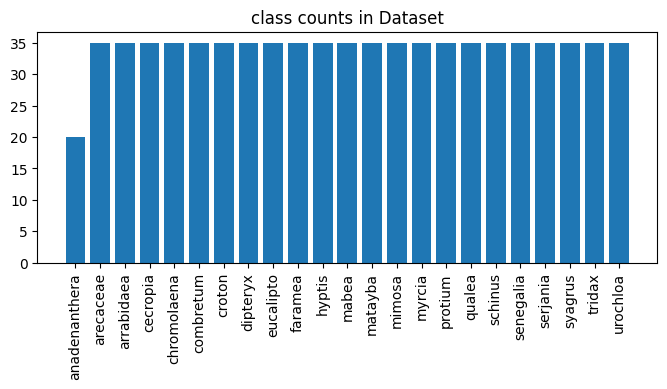

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))  
plt.title('class counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation=90)
plt.show()

In [29]:
path_classes={key:[] for key in classes.keys()}
for name in os.listdir(path):
    class_name = name.replace(" ", "_").split('_')[0]
    path_classes[class_name].append(os.path.join(path, name))

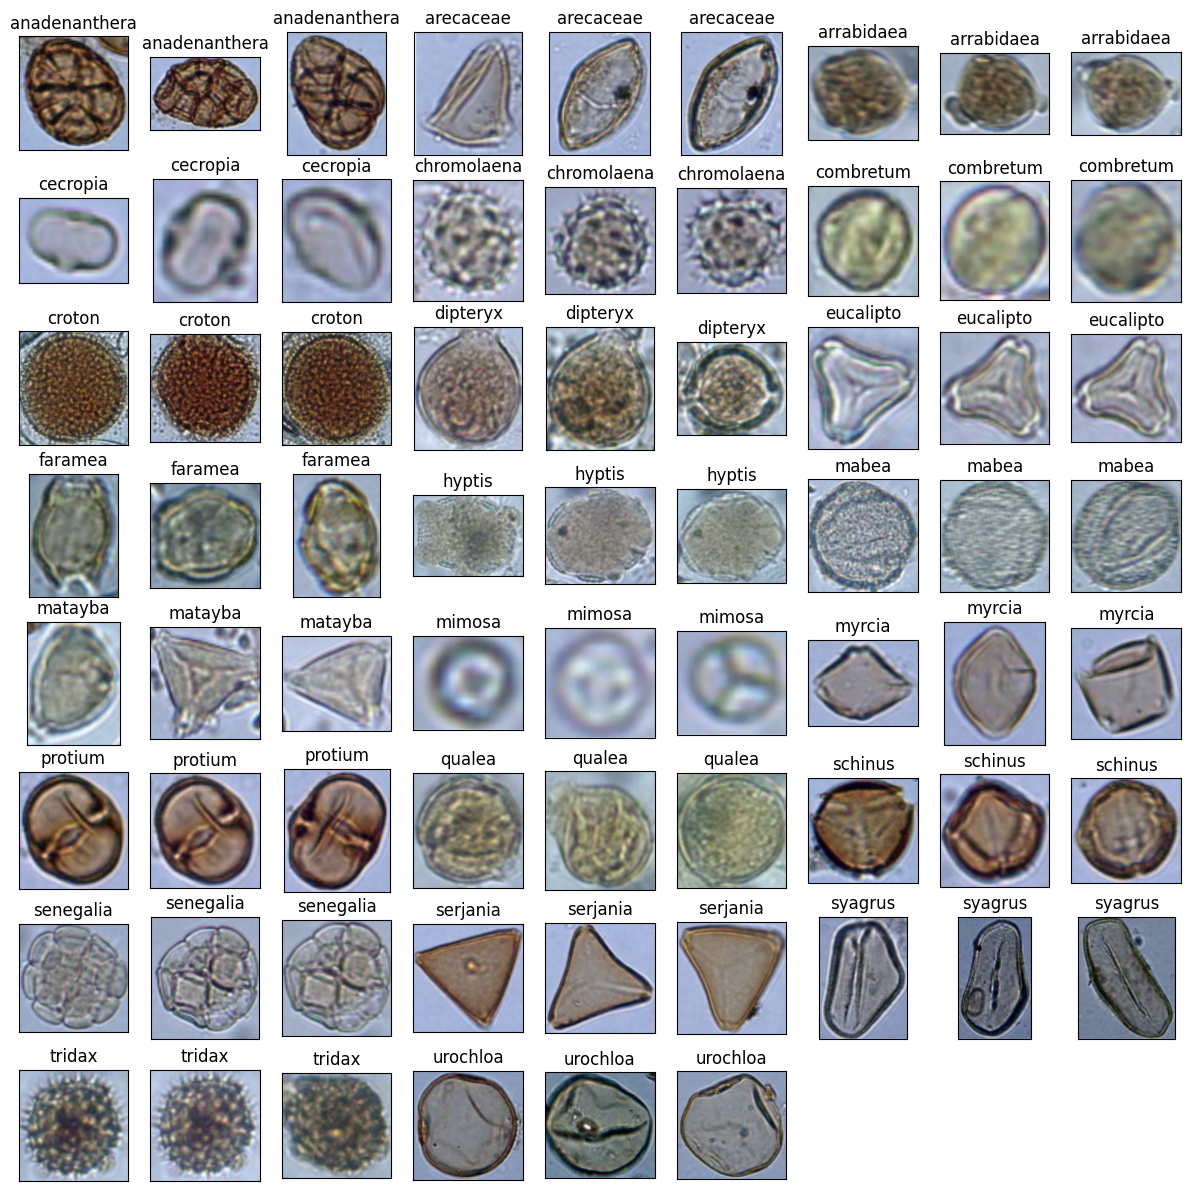

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(15, 15))

for i, key in enumerate(path_classes.keys()):
    img1 = Image.open(path_classes[key][0])
    img2 = Image.open(path_classes[key][1])
    img3 = Image.open(path_classes[key][2])

    ax = fig.add_subplot(8, 9, 3*i+1, xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9, 3*i+2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9, 3*i+3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

plt.show()


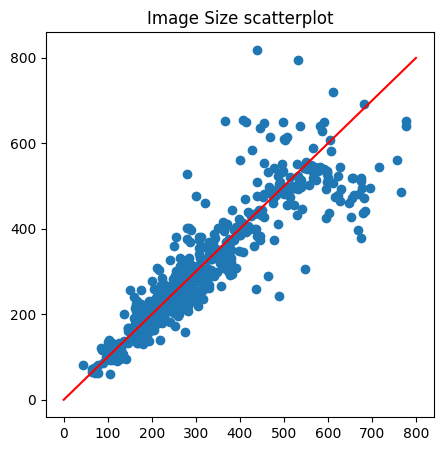

In [31]:
import cv2
size=[cv2.imread(path + name).shape for name in os.listdir(path)]
x,y,_ = zip(*size)

fig= plt.figure(figsize=(5, 5))
plt.scatter(x,y)
plt.title('Image Size scatterplot')

plt.plot([0,800],[0,800],'r')


In [32]:
def process_img(img,size=(128,128)):
    img=cv2.resize(img,size)
    img = img.astype('float32')/255.0
    return img

In [33]:
import numpy as np
x,y = [],[]
for name in os.listdir(path):
    img = cv2.imread(os.path.join(path, name))
    x.append(process_img(img))
    y.append(name.replace(" ", "_").split('_')[0])
x = np.array(x)


In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le= LabelEncoder()
y_le = le.fit_transform(y)
y_cat= to_categorical(y_le)


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.285, stratify=y_le)
print('images in each class in test set:{}'.format(np.sum(y_test, axis=0)))

images in each class in test set:[ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

input_shape=x_train[0].shape
output_shape=23
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=3,input_shape=input_shape,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))
model.summary()


e:\POLLEN_GRAIN\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,272,563 (16.30 MB)

 Trainable params: 4,272,563 (16.30 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
print('Model is compiled')

Model is compiled


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)
datagener.fit(x_train)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
batch_size = 32
epochs = 100
model_path = 'cnn.keras'
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
        ModelCheckpoint(filepath=model_path, save_best_only=True)]

history = model.fit(
    datagener.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_train, y_train),
    callbacks=callbacks,
    verbose=1
)


e:\POLLEN_GRAIN\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.8488 - loss: 0.4491 - val_accuracy: 0.8599 - val_loss: 0.3656
Epoch 2/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7188 - loss: 0.6566

e:\POLLEN_GRAIN\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7188 - loss: 0.6566 - val_accuracy: 0.8794 - val_loss: 0.3272
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.8923 - loss: 0.3823 - val_accuracy: 0.8457 - val_loss: 0.4888
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6250 - loss: 0.9717 - val_accuracy: 0.8174 - val_loss: 0.4720
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.8182 - loss: 0.5341 - val_accuracy: 0.9149 - val_loss: 0.2311
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9000 - loss: 0.3030 - val_accuracy: 0.9238 - val_loss: 0.2232
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.8844 - loss: 0.3601 - val_accuracy: 0.8918 - val_loss: 0.2877
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8438 - loss: 0.3243 - val_accuracy: 0.8582 - val_loss: 0.3684
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.8269 - loss: 0.5455 - val_accuracy: 0.7695 - v

In [53]:
model.load_weights(model_path)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test set accuracy: {}'.format(score[1]))

Test set accuracy: 0.8893805146217346


In [54]:
model.save('model.keras')


In [56]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model('model.keras')

img = load_img('E:/POLLEN_GRAIN/data/urochloa (18).jpg', target_size=(128, 128))
img = img.resize((128, 128))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
a = np.argmax(model.predict(x),axis=1)
index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']
result = str(index[a[0]])
print(result)
op = ["arecaceae",'anadenanthera','arrabidea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto','faramea','hyptis','mabea','matayba','mimosa','myrcia','protium','qualea','schinus','senegalia','sergenia','syagrus','tridax','urochloa']
result = op[a[0]]   
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1
anadenanthera
